# What factors affect the time to close a ticket?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use(['fivethirtyeight'])
mpl.rcParams['lines.linewidth'] = 3
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split


In [9]:
df = pd.read_csv('311_cleaned_2.csv')
df.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year
0,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,3.017890e+09,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)",2011,2011
1,20122821,03/28/2011 10:57:31 PM,05/19/2011 01:13:06 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011
2,20122822,03/28/2011 12:13:02 PM,05/19/2011 01:12:55 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011
3,20122823,03/28/2011 04:23:23 PM,05/19/2011 01:13:02 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11360.0,BAYSIDE,4.058938e+09,40.779012,-73.782085,"(40.779012083546895, -73.78208491752011)",2011,2011
4,20122824,03/28/2011 11:14:53 AM,04/04/2011 12:46:58 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11205.0,BROOKLYN,3.019170e+09,40.690711,-73.966360,"(40.69071138727672, -73.96636009530222)",2011,2011


In [63]:
df_filter = df.head(10000)

In [64]:
# Create function that calculates the time diff in minutes between created and closed date
from datetime import datetime, timedelta
import time
def getCallDuration(created, closed):
    # Assign format and type
    time_format = "%m/%d/%Y %I:%M:%S %p"
    created_date = datetime.strptime(created, time_format)
    closed_date = datetime.strptime(closed, time_format)
    
    # Convert to unix timestamp
    created_date = time.mktime(created_date.timetuple())
    closed_date = time.mktime(closed_date.timetuple())
    
    # they are now in seconds, subtract and then divide by 60 to get minutes.
    return int(closed_date-created_date) / 60

In [65]:
# Now create a new column named Call Duration and store the values of the above function
df_filter['resolution_time']= df_filter[['created_date','closed_date']].apply(lambda x: getCallDuration(*x), axis=1)

In [66]:
df_filter.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year,resolution_time
0,20122811,03/28/2011 11:12:27 PM,03/29/2011 05:07:13 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11216.0,BROOKLYN,3.017890e+09,40.690123,-73.949135,"(40.69012317171803, -73.94913492072885)",2011,2011,354.766667
1,20122821,03/28/2011 10:57:31 PM,05/19/2011 01:13:06 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011,74295.583333
2,20122822,03/28/2011 12:13:02 PM,05/19/2011 01:12:55 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,10009.0,NEW YORK,1.003910e+09,40.726053,-73.979818,"(40.726053362722304, -73.97981762009752)",2011,2011,74939.883333
3,20122823,03/28/2011 04:23:23 PM,05/19/2011 01:13:02 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11360.0,BAYSIDE,4.058938e+09,40.779012,-73.782085,"(40.779012083546895, -73.78208491752011)",2011,2011,74689.650000
4,20122824,03/28/2011 11:14:53 AM,04/04/2011 12:46:58 PM,DOHMH,Department of Health and Mental Hygiene,Indoor Air Quality,Dust from Construction,3+ Family Apartment Building,11205.0,BROOKLYN,3.019170e+09,40.690711,-73.966360,"(40.69071138727672, -73.96636009530222)",2011,2011,10172.083333


In [67]:
df_filter.complaint_type.unique()

array(['Illegal Parking', 'Indoor Air Quality', 'Dead Tree',
       'For Hire Vehicle Complaint', 'Graffiti', 'APPLIANCE',
       'DOORWINDOW', 'FLOORINGSTAIRS', 'GENERAL', 'Street Condition',
       'Food Establishment', 'Street Sign  Missing', 'Traffic',
       'HEATHOT WATER', 'RootSewerSidewalk Condition',
       'Overgrown TreeBranches', 'Blocked Driveway', 'Taxi Complaint',
       'Noise  Residential', 'Noise  StreetSidewalk', 'PAINT  PLASTER',
       'PAINTPLASTER', 'Missed Collection All Materials',
       'Other Enforcement', 'Derelict Vehicles', 'Sanitation Condition',
       'Animal Abuse', 'PLUMBING', 'ELECTRIC', 'UNSANITARY CONDITION',
       'Dirty Conditions', 'Derelict Vehicle', 'AdoptABasket',
       'CONSTRUCTION', 'GENERAL CONSTRUCTION', 'WATER LEAK',
       'Request Large Bulky Item Collection', 'Sidewalk Condition',
       'Recycling Enforcement', 'Damaged Tree', 'HEATING', 'Construction',
       'Electronics Waste', 'Curb Condition', 'NONCONST', 'DPR Internal',
  

In [22]:
df_filter.city.unique()

array(['BROOKLYN', 'NEW YORK', 'BAYSIDE', 'BRONX', 'HOLLIS', 'FLUSHING',
       'STATEN ISLAND', 'JAMAICA', 'Jamaica', 'College Point',
       'Kew Gardens', 'QUEENS VILLAGE', 'EAST ELMHURST', 'CORONA',
       'MASPETH', 'LONG ISLAND CITY', 'LITTLE NECK', 'RIDGEWOOD',
       'FOREST HILLS', 'SAINT ALBANS', 'Far Rockaway', 'SOUTH OZONE PARK',
       'ELMHURST', 'REGO PARK', 'MIDDLE VILLAGE', 'CAMBRIA HEIGHTS',
       'GLEN OAKS', 'WOODSIDE', 'ARVERNE', 'Springfield Gardens',
       'SUNNYSIDE', 'ASTORIA', 'FAR ROCKAWAY', 'OZONE PARK',
       'SPRINGFIELD GARDENS', 'Bellerose', 'JACKSON HEIGHTS', 'Corona',
       'FRESH MEADOWS', 'COLLEGE POINT', 'RICHMOND HILL', 'KEW GARDENS',
       'ROSEDALE', 'Woodside', 'South Ozone Park', 'HOWARD BEACH',
       'East Elmhurst', 'OAKLAND GARDENS', 'Middle Village',
       'SOUTH RICHMOND HILL', 'Rosedale', 'WOODHAVEN', 'Bayside',
       'Astoria', 'Fresh Meadows', 'FLORAL PARK', 'Ridgewood',
       'Ozone Park', 'Maspeth', 'WHITESTONE', 'BELLEROSE',

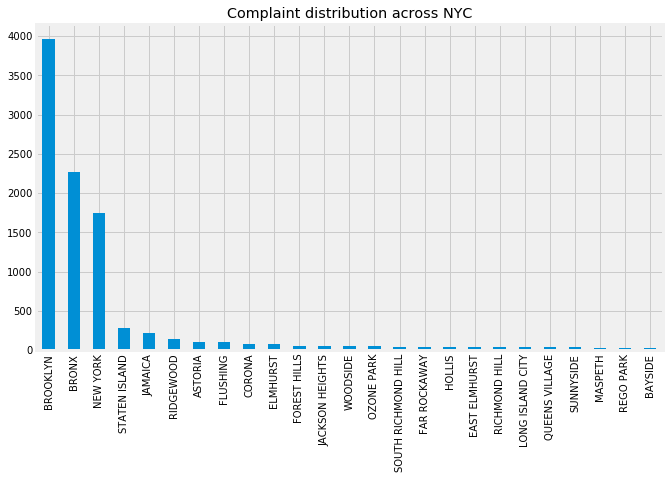

In [24]:
(df_filter['city'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Complaint distribution across NYC')

In [28]:
df_Brooklyn = df_filter[df_filter['city']=='BROOKLYN']
df_Brooklyn.shape

(3958, 17)

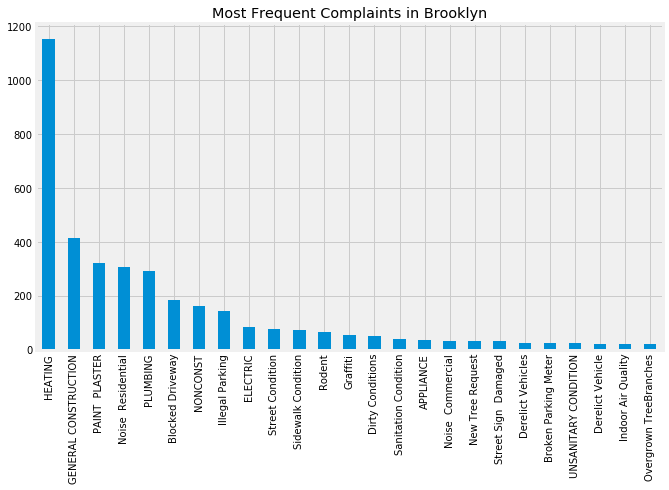

In [29]:
(df_Brooklyn['complaint_type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Most Frequent Complaints in Brooklyn')

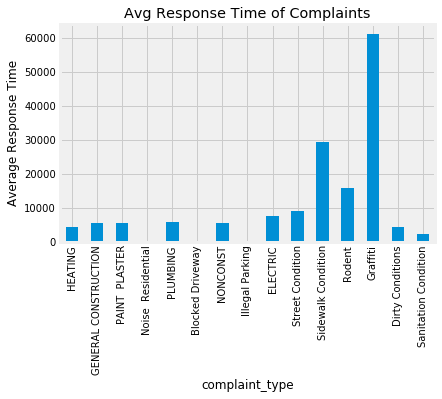

In [35]:
var = df_Brooklyn.groupby('complaint_type').resolution_time.mean()
frequent = df_Brooklyn['complaint_type'].value_counts().head(25)
var = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('complaint_type')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Complaints")
var.head(15).plot(kind='bar')

In [ ]:
# We can see that usually noise and illegal parking are resolved within same day but While issues like Graffiti 
# take a rather long time to resolve.

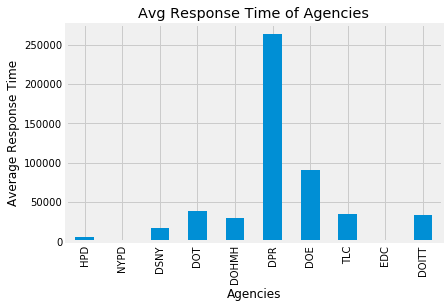

In [36]:
var = df_Brooklyn.groupby('agency').resolution_time.mean()
frequent = df_Brooklyn['agency'].value_counts().head(25)
var1 = var.ix[frequent.index]
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Agencies')
ax1.set_ylabel('Average Response Time')
ax1.set_title("Avg Response Time of Agencies")
var1.head(25).plot(kind='bar')

In [ ]:
# From the above graph we can conclude that DPR, DOE are the most efficient agencies 
# among the rest. These are also the agencies which generally solve the most number of complaints.

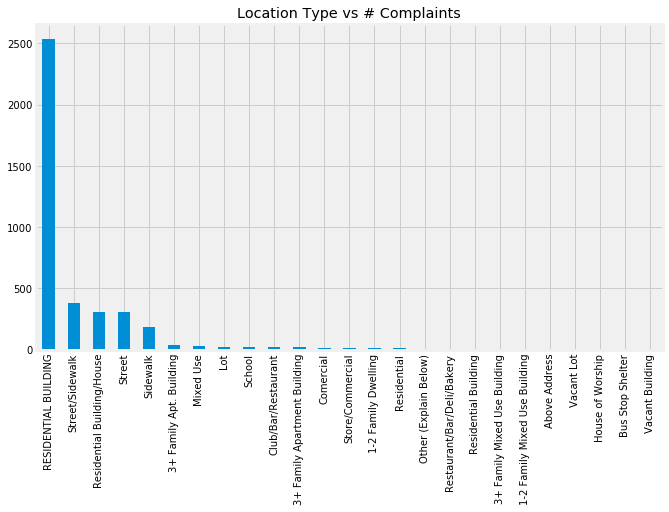

In [37]:
(df_Brooklyn['location_type'].value_counts()).head(25).plot(kind='bar',
                                                    figsize=(10,6),title = 'Location Type vs # Complaints')

In [ ]:
#This graph is telling us that most number of complaints came from residential locations. We can relate that most common 
#complaint type is Heating and these must be coming from resedential buildings during the winters.

(-74.04004956341015, -73.86310539265226, 40.57275076392121, 40.73789197792883)

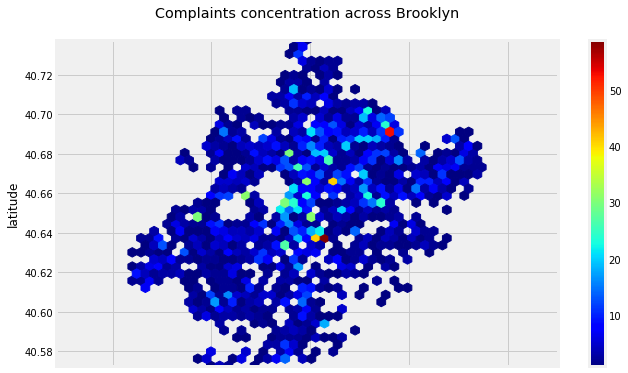

In [39]:
df_Brooklyn.plot(kind='hexbin', x='longitude', y='latitude', gridsize=40,
    colormap = 'jet',mincnt=1,title = 'Complaints concentration across Brooklyn\n', figsize=(10,6)).axis('equal')

(-74.03826694474519, -73.86562177252608, 40.57372505527165, 40.736377707794)

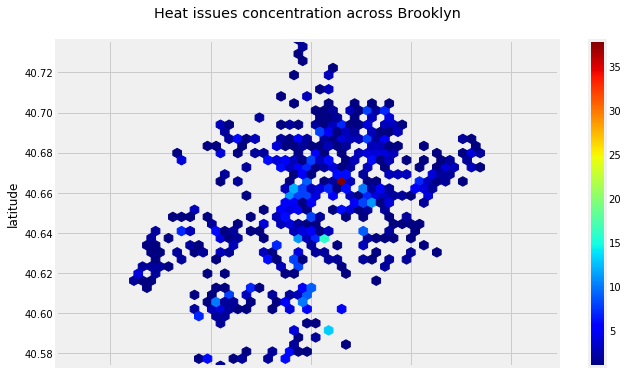

In [45]:
df_Brook_Heat = df_Brooklyn[df_Brooklyn['complaint_type'] == 'HEATING']
df_Brook_Heat[df_Brook_Heat['complaint_type'] == 'HEATING'].plot(
    kind='hexbin', x='longitude', y='latitude', gridsize=40,title = 'Heat issues concentration across Brooklyn\n',
    colormap='jet', mincnt=1, figsize=(10,6)).axis('equal')

In [51]:
df_Brook_Heat.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year,resolution_time
603,20124749,03/28/2011 12:00:00 AM,03/28/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11213.0,BROOKLYN,3.013900e+09,40.668873,-73.932338,"(40.66887271462272, -73.93233848024539)",2011,2011,0.0
610,20124756,03/28/2011 12:00:00 AM,04/02/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11226.0,BROOKLYN,3.048530e+09,40.653462,-73.949844,"(40.653461505472904, -73.94984401672039)",2011,2011,7200.0
611,20124757,03/28/2011 12:00:00 AM,04/01/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11211.0,BROOKLYN,3.028840e+09,40.717026,-73.940767,"(40.71702610668888, -73.94076692605162)",2011,2011,5760.0
613,20124759,03/28/2011 12:00:00 AM,04/01/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11211.0,BROOKLYN,3.029200e+09,40.713282,-73.940327,"(40.71328202455212, -73.94032657117829)",2011,2011,5760.0
614,20124760,03/28/2011 12:00:00 AM,03/29/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,RESIDENTIAL BUILDING,11203.0,BROOKLYN,3.014290e+09,40.663244,-73.934550,"(40.66324445328309, -73.93455012232168)",2011,2011,1440.0


In [46]:
## Resolution time of heat issues in brooklyn

In [68]:
#Define list of complaint types to extract
house_complaint_types = ['HEATING','PLUMBING','GENERAL CONSTRUCTION','PAINT/PLASTER','ELECTRIC']

#Filter main data frame
df_filter = df_filter[df_filter['complaint_type'].isin(house_complaint_types)]

#Re-assign call frequency
call_freq = df_filter['complaint_type'].groupby(df['complaint_type']).count(
).sort_values(ascending=False).reset_index(name='count')
call_freq

,complaint_type,count
0,HEATING,3301
1,GENERAL CONSTRUCTION,662
2,PLUMBING,558
3,ELECTRIC,186


In [72]:
df_filter.head()

,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,city,bbl,latitude,longitude,location,created_year,closed_year,resolution_time
217,20123636,03/28/2011 12:00:00 AM,04/03/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10455.0,BRONX,2.025770e+09,40.811197,-73.908810,"(40.8111965828086, -73.90881021676769)",2011,2011,8640.0
218,20123637,03/28/2011 12:00:00 AM,03/30/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11104.0,SUNNYSIDE,4.001930e+09,40.742996,-73.924410,"(40.742995648554356, -73.92441049712794)",2011,2011,2880.0
219,20123638,03/28/2011 12:00:00 AM,04/03/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10455.0,BRONX,2.025770e+09,40.811197,-73.908810,"(40.8111965828086, -73.90881021676769)",2011,2011,8640.0
220,20123639,03/28/2011 12:00:00 AM,04/01/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,10457.0,BRONX,2.029460e+09,40.844981,-73.892716,"(40.84498116786694, -73.89271634780746)",2011,2011,5760.0
221,20123644,03/28/2011 12:00:00 AM,04/03/2011 12:00:00 AM,HPD,Department of Housing Preservation and Develop...,PLUMBING,BASIN/SINK,RESIDENTIAL BUILDING,11432.0,JAMAICA,4.098190e+09,40.709153,-73.794231,"(40.70915288846408, -73.79423068611376)",2011,2011,8640.0


The resolution time says how long did it take for the authority that was in charge of a 311 request to handle it. We think it might be reasonable to consider this variable as a measure of efficiency of the 311 service. We need to identify relevant features for prediction models, let's see if there's any correlation between the average resolution time and the type of complaint, and how did this improve over the years.


In [81]:
years = sorted(list(df['created_year'].unique()))

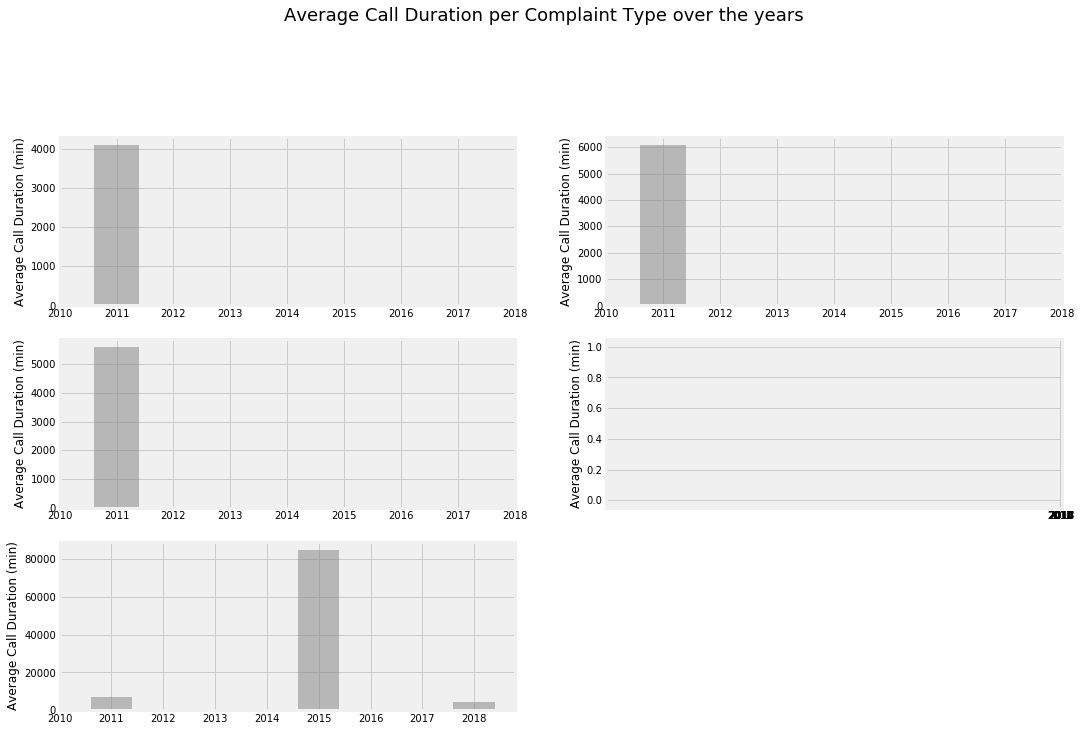

In [85]:
plt.figure(figsize = (16,18))
plt.suptitle('Average Call Duration per Complaint Type over the years',fontsize=18)
for index,complaint_type in enumerate(house_complaint_types):
    # Create a matrix of subplots with 5 rows and two columns
    plt.subplot(5,2,index+1)
    
    # Create a sub-df for each category
    temp_df = df_filter[df_filter['complaint_type']==complaint_type]
    
    # Drop column category from the new df to keep only hour
    temp_df = temp_df.drop('complaint_type', axis=1) # axis=1 means column
    
    # Drop 2017 as it could be misleading as only few values for the first two months exist
    temp_df = temp_df[temp_df['created_year'] != 2017]
    
    # Calculate average of call duration per year
    average = temp_df.groupby('created_year')['resolution_time'].apply(lambda x:np.mean(x)).reset_index(name='mean').sort_values(by='created_year', ascending=1)
    
    # Assign x and y values
    x = average['created_year']
    y = average['mean']

    bars = plt.bar(x,y,align='center',alpha=.5, color='grey',label=complaint_type)
    plt.xticks(years[:-1],[str(year) for year in years[:-1]])
    plt.ylabel("Average Call Duration (min)")
# Show the barplot
plt.show()


### From the above plots, we can already infer some stats:

Not all complaint types have been existing since 2010, and at the same time, not all of them kept existing until 2017 (GENERAL CONSTRUCTION, e.g.). Threfore, over the years the nature of the data has changed, and this might be difficult to keep into consideration to find relevant correlations;
Concerning the other types, it doesn't look like there's a particular pattern in the frequency over the years...